In [2]:
import torch

The function torch.randn(3) creates a 1D tensor of size 3 with elements drawn from a standard normal distribution (mean = 0, standard deviation = 1). This generates a tensor of 3 elements where each element is randomly sampled from a normal (Gaussian) distribution with mean 0 and standard deviation 1. These numbers will be different each time you run the code, as they are sampled randomly. <br> **requires_grad=True** :
This ensures that PyTorch tracks all operations involving this tensor x so that when backpropagation is performed, the gradients with respect to x can be computed. It enables autograd (automatic differentiation) for this tensor.    

In [3]:
x = torch.randn (3, requires_grad=True)
print (x)

tensor([ 0.9005, -1.1318,  1.4628], requires_grad=True)


In [4]:
y = x + 2
print (y)

tensor([2.9005, 0.8682, 3.4628], grad_fn=<AddBackward0>)


The grad_fn=<MeanBackward0> indicates that PyTorch is tracking the mean operation for future gradient computation.

In [5]:
z = y * y * 2
z = z.mean()
print (z)

tensor(14.1051, grad_fn=<MeanBackward0>)


When you run z.backward() in PyTorch, it computes the gradients of z with respect to x, i.e.,dz/dx since x has requires_grad=True.

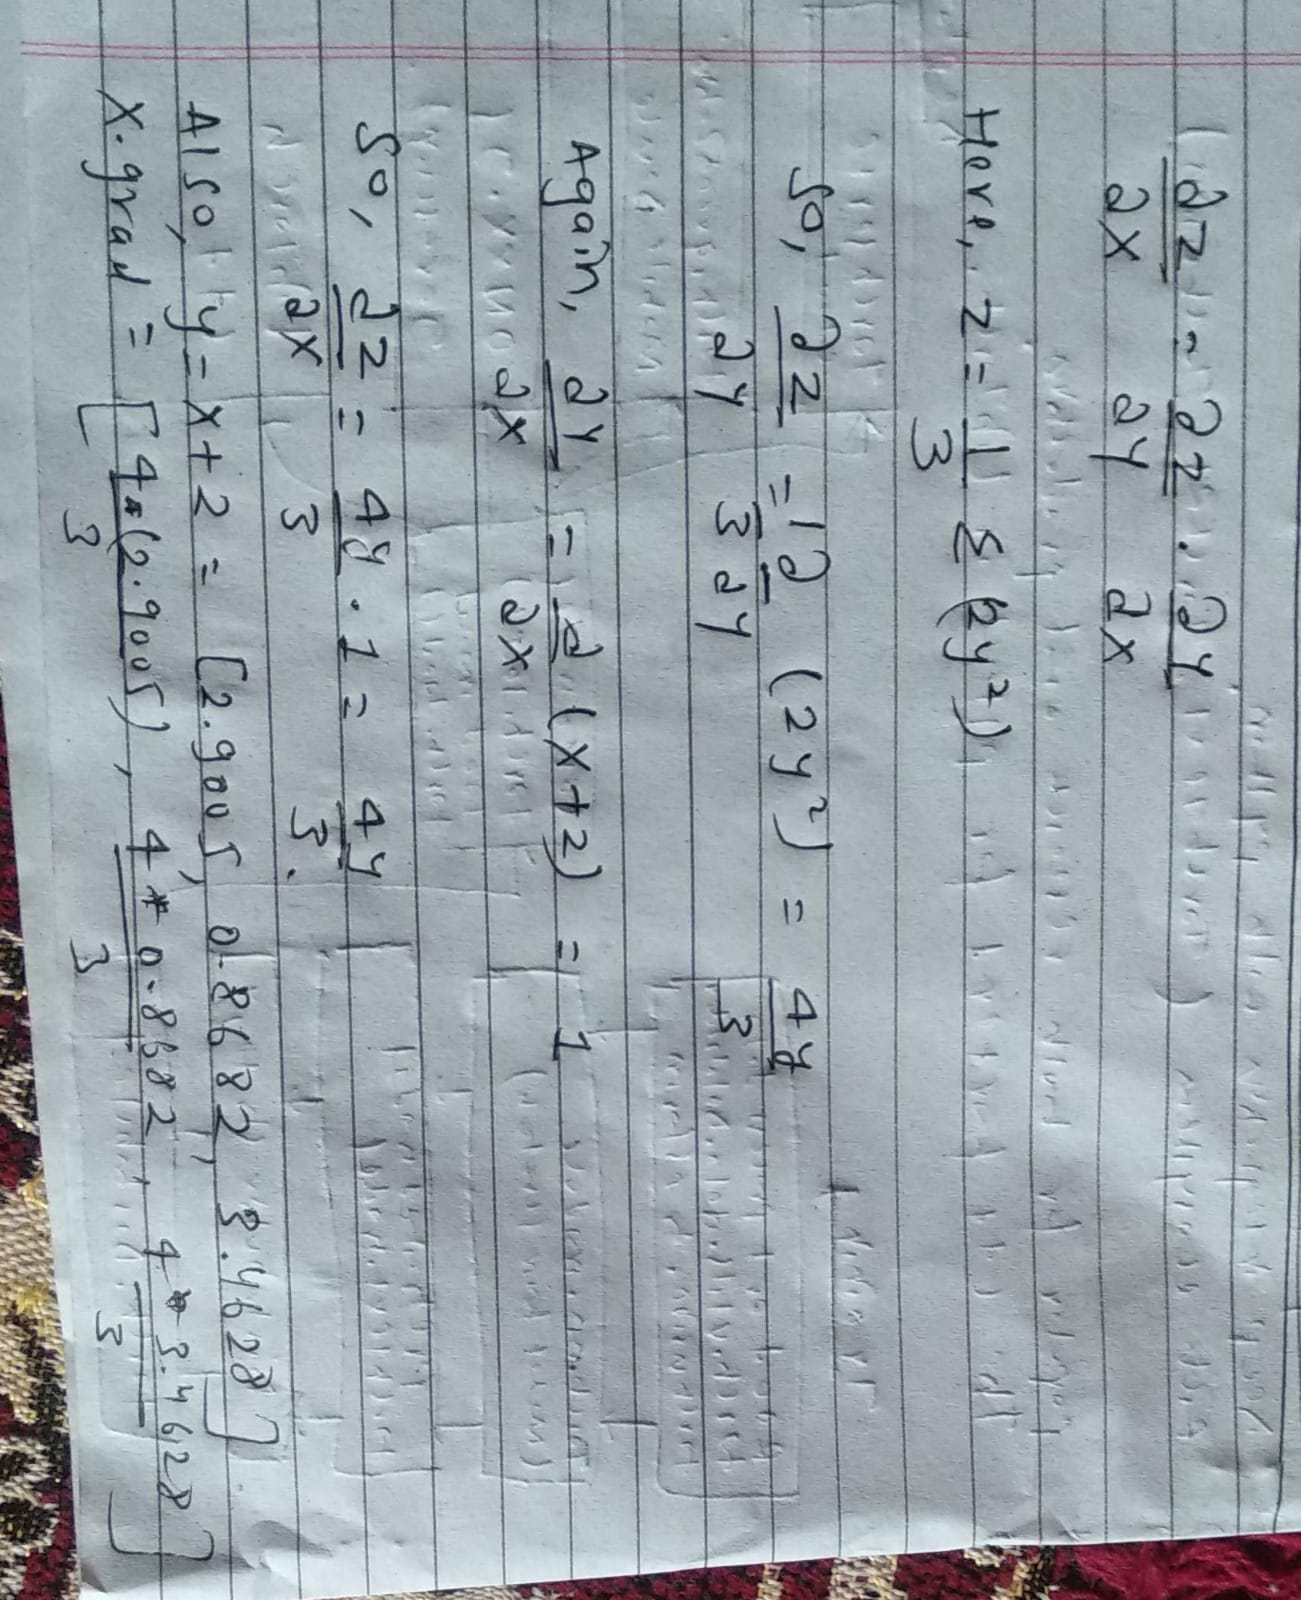

In [6]:
z.backward() #dz/dx
print (x.grad)

tensor([3.8674, 1.1576, 4.6170])


# Example 2:

In [8]:
a = torch.tensor(3., requires_grad=True)
print (a)

tensor(3., requires_grad=True)


In [9]:
y = 3*a*a + 4*a + 2
print (y)

tensor(41., grad_fn=<AddBackward0>)


In [10]:
y.backward() # Derivative of 3*a*a + 4*a + 2 is, 6a+4

In [11]:
print (a.grad) # 6a+4 is 6*3+4 = 22

tensor(22.)


# Turn Gradient Calculation off

In [12]:
c = torch.tensor (2., requires_grad=True)
print (c)

tensor(2., requires_grad=True)


In [13]:
c = c.requires_grad_(False)
print (c)

tensor(2.)


In [14]:
#another way
c = c.detach()
print (c)

tensor(2.)


# Gradient accumulation

In [15]:
x = torch.tensor(5., requires_grad=True)
for epoch in range (3):
    y = 3*x**2 + 4*x + 2
    y.backward()  # dy/dx is 6x+4
    print(x.grad) # 6*5+4 is 34

tensor(34.)
tensor(68.)
tensor(102.)


Gradients are adding up. To avoid this we use grad.zero_()

In [16]:
x = torch.tensor(5., requires_grad=True)
for epoch in range (3):
    y = 3*x**2 + 4*x + 2
    y.backward()
    print(x.grad)
    x.grad.zero_()

tensor(34.)
tensor(34.)
tensor(34.)
